# Analyze dynamics and frequency spectra of filaments driven with a constant compressive tip follower-force

In [21]:
import sys
if 'init_modules' in globals().keys():
    # second or subsequent run: remove all but initially loaded modules
    for m in sys.modules.keys():
        if m not in init_modules:
            del(sys.modules[m])
else:
    # first run: find out which modules were initially loaded
    init_modules = sys.modules.keys()
    
import numpy as np
from scipy import signal
from scipy import interpolate
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy import interpolate
import pandas as pd

import os
import pyfilaments.analysisutils as analysis
import imp
imp.reload(analysis)
%matplotlib notebook
plt.close('all')

In [22]:
# Load a constant compressive load file.
# file = '/home/deepak/ActiveFilamentsSearch_backup_3/ConstantCompressiveActivity_sweep/SimResults_Np_32_Shape_line_kappa_hat_6_k_25_b0_2.1_F_0_S_0_D_1.0128205128205128_activityTime_750_simType_point/SimResults_00_.hdf5'

# file = '/home/deepak/ActiveFilamentsSearch_backup_3/ConstantCompressiveActivity_sweep/SimResults_Np_32_Shape_line_kappa_hat_6_k_25_b0_2.1_F_0_S_0_D_0.5_activityTime_750_simType_point/SimResults_00_.hdf5'

file = '/home/deepak/ActiveFilamentsSearch_backup_3/ModellingResults/2022-12-26/SimData_Np_32_Shape_line_kappa_hat_6_k_25_b0_2.1_F_0_S_0_D_0.1_activityTime_750_simType_lacry/sim_data_00_.hdf5'

filament = analysis.analysisTools(file = file)

In [23]:
# Frequency-spectrum of filament dynamics to extract the fundamental frequency
filament.compute_base_tip_angle()

start_index = int(filament.Nt/2)
end_index = int(filament.Nt)

time_array = filament.Time[start_index:end_index]
time_series_data = filament.derived_data['base tip angle'][start_index:end_index]
time_series_data = time_series_data - np.mean(time_series_data)
N_signal = len(time_series_data)

In [24]:
### FFT of the base tip angle time-series data
from scipy.fft import rfft, rfftfreq

SAMPLE_RATE = filament.Nt/(max(filament.Time))

print('Time series sample rate: {}'.format(SAMPLE_RATE))
yf = rfft(time_series_data)
xf = rfftfreq(N_signal, 1 / SAMPLE_RATE)

Time series sample rate: 0.20002666666666666


In [25]:
# Find the dominant frequency
clip_point = int(len(xf)/5)
idx = np.argmax(np.abs(yf))

freq_dom = np.abs(xf)[idx]
cycle_time = 1/freq_dom
print('Flapping freq: {} cycles/time'.format(freq_dom))
print('Flapping time: {}'.format(cycle_time))

Flapping freq: 0.0006399146894161556 cycles/time
Flapping time: 1562.708305559259


<IPython.core.display.Javascript object>


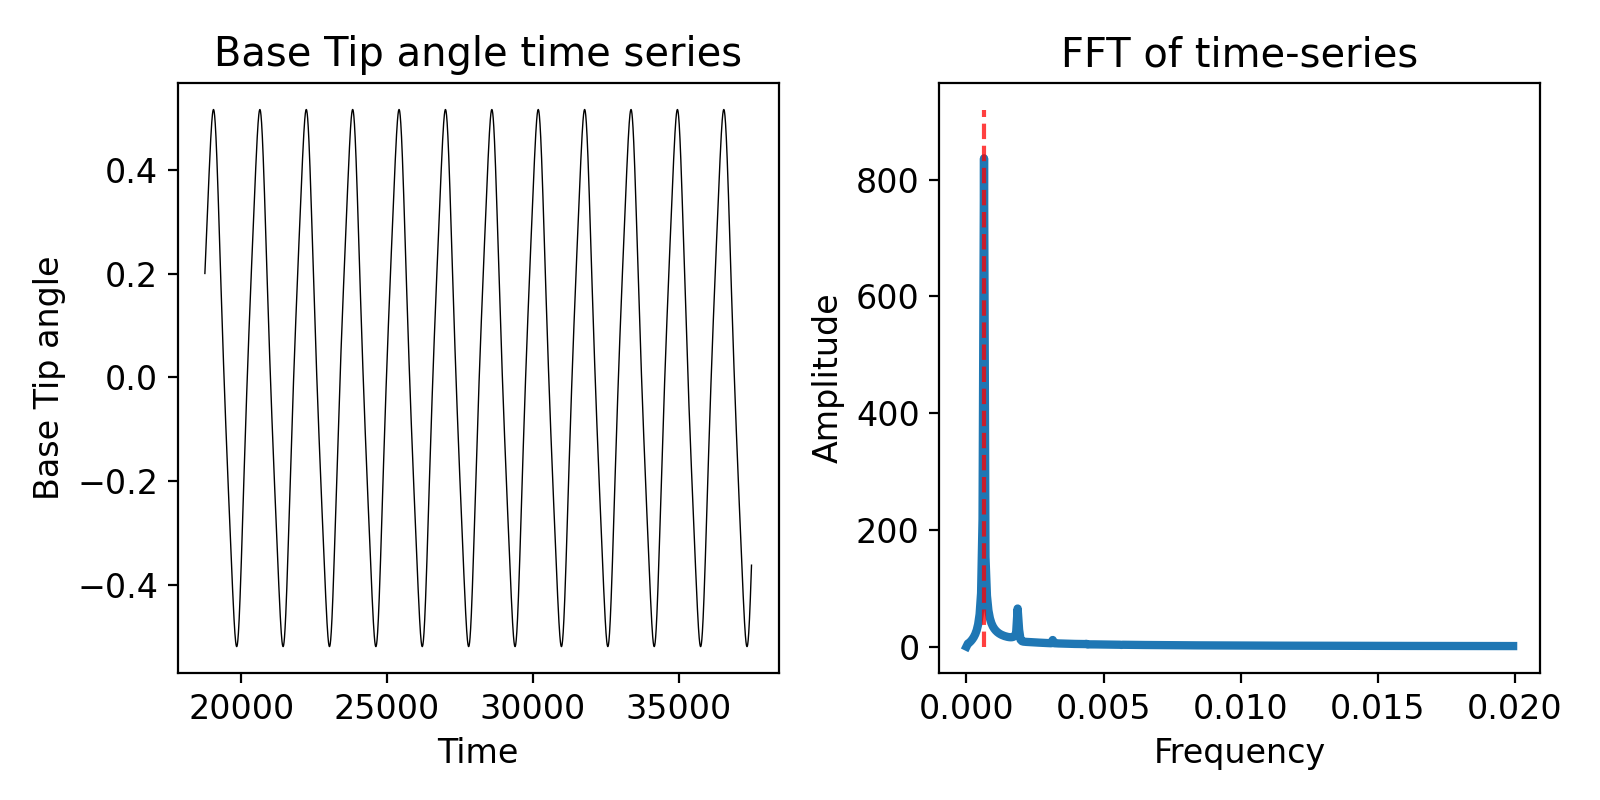

In [26]:
# Plot the time series and the FFT spectrum
fig, (ax0, ax1) = plt.subplots(nrows=1, ncols = 2, figsize = (8, 4))


ax0.plot(time_array, time_series_data,color = 'k', linewidth = 0.5)
ax0.set_xlabel('Time')
ax0.set_ylabel('Base Tip angle')
ax0.set_title('Base Tip angle time series')

ax1.plot(xf[:clip_point], np.abs(yf[:clip_point]), linewidth = 3)
# Draw the forcing frequency
plt.vlines(freq_dom, 0, np.max(np.abs(yf[:clip_point]))+np.max(np.abs(yf[:clip_point]))/10, color = 'r', linestyle = '--',zorder=100, alpha = 0.75)
ax1.set_xlabel('Frequency')
ax1.set_ylabel('Amplitude')
ax1.set_title('FFT of time-series')
plt.tight_layout()

# Save the plot
# plt.savefig(os.path.join(file_path, 'filament_time_series_fft.png'), dpi = 300)
# plt.savefig(os.path.join(file_path, 'filament_time_series_fft.svg'), dpi = 300)

plt.show()

In [27]:
# 
filament.time_scales()
filament.compute_scales()
filament.compute_dimensionless_groups()       
            

**************************************************
Time-scales
**************************************************
Stretch relzation time: 0.43
Bend relaxation time: 228072.75
Active motility time-scale: 10.0
31
**************************************************
Dimensionless numbers
**************************************************
Force per unit lenth due to activity: 0.00026
Activity number: 166.8296
**************************************************


In [28]:
from scipy.fft import rfft, rfftfreq

def compute_filament_freq(filament = None, plot = False):
    filament.compute_base_tip_angle()

    start_index = int(filament.Nt/2)
    end_index = int(filament.Nt)

    time_array = filament.Time[start_index:end_index]
    time_series_data = filament.derived_data['base tip angle'][start_index:end_index]
    time_series_data = time_series_data - np.mean(time_series_data)
    N_signal = len(time_series_data)
    
    ### FFT of the base tip angle time-series data

    SAMPLE_RATE = filament.Nt/(max(filament.Time))

    print('Time series sample rate: {}'.format(SAMPLE_RATE))
    yf = rfft(time_series_data)
    xf = rfftfreq(N_signal, 1 / SAMPLE_RATE)
    
    # Find the dominant frequency
    clip_point = int(len(xf)/5)
    idx = np.argmax(np.abs(yf))

    freq_dom = np.abs(xf)[idx]
    cycle_time = 1/freq_dom
    print('Flapping freq: {} cycles/time'.format(freq_dom))
    print('Flapping time: {}'.format(cycle_time))
    
    
    if plot:
        fig, (ax0, ax1) = plt.subplots(nrows=1, ncols = 2, figsize = (8, 4))
        ax0.plot(time_array, time_series_data,color = 'k', linewidth = 0.5)
        ax0.set_xlabel('Time')
        ax0.set_ylabel('Base Tip angle')
        ax0.set_title('Base Tip angle time series')

        ax1.plot(xf[:clip_point], np.abs(yf[:clip_point]), linewidth = 3)
        # Draw the forcing frequency
        plt.vlines(freq_dom, 0, np.max(np.abs(yf[:clip_point]))+np.max(np.abs(yf[:clip_point]))/10, color = 'r', linestyle = '--',zorder=100, alpha = 0.75)
        ax1.set_xlabel('Frequency')
        ax1.set_ylabel('Amplitude')
        ax1.set_title('FFT of time-series')
        plt.tight_layout()

        # Save the plot
        # plt.savefig(os.path.join(file_path, 'filament_time_series_fft.png'), dpi = 300)
        # plt.savefig(os.path.join(file_path, 'filament_time_series_fft.svg'), dpi = 300)

        plt.show()
        
    return freq_dom
        
    

Time series sample rate: 0.20002666666666666
Flapping freq: 0.0013331556029503241 cycles/time
Flapping time: 750.0999866684443


<IPython.core.display.Javascript object>


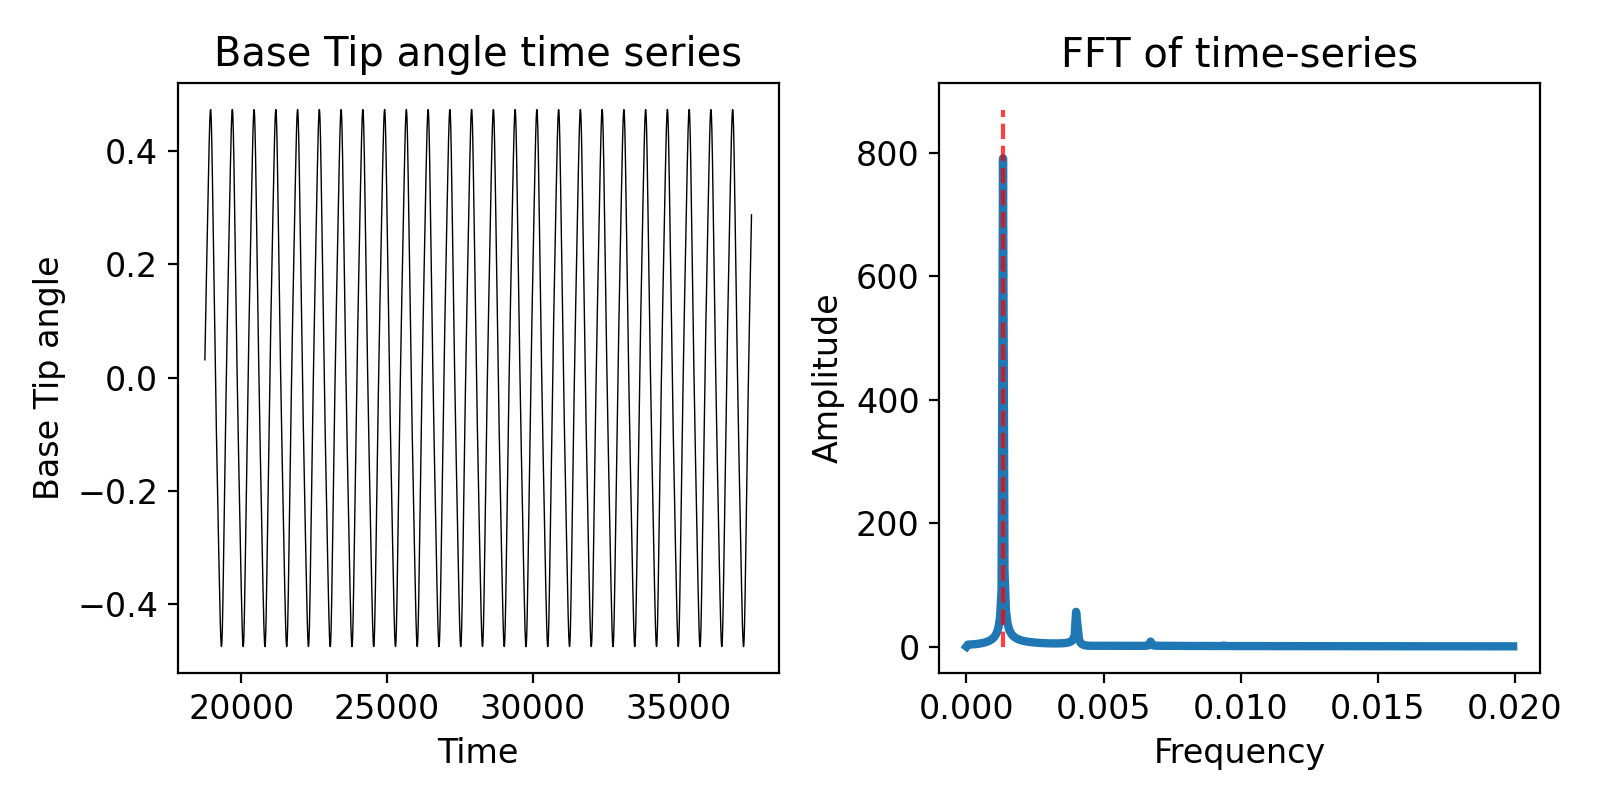

**************************************************
Time-scales
**************************************************
Stretch relzation time: 0.43
Bend relaxation time: 228072.75
Active motility time-scale: 5.81
31
**************************************************
Dimensionless numbers
**************************************************
Force per unit lenth due to activity: 0.00044
Activity number: 287.31764
**************************************************
Time series sample rate: 0.20002666666666666
Flapping freq: 0.006559125566515595 cycles/time
Flapping time: 152.45934688383014


<IPython.core.display.Javascript object>


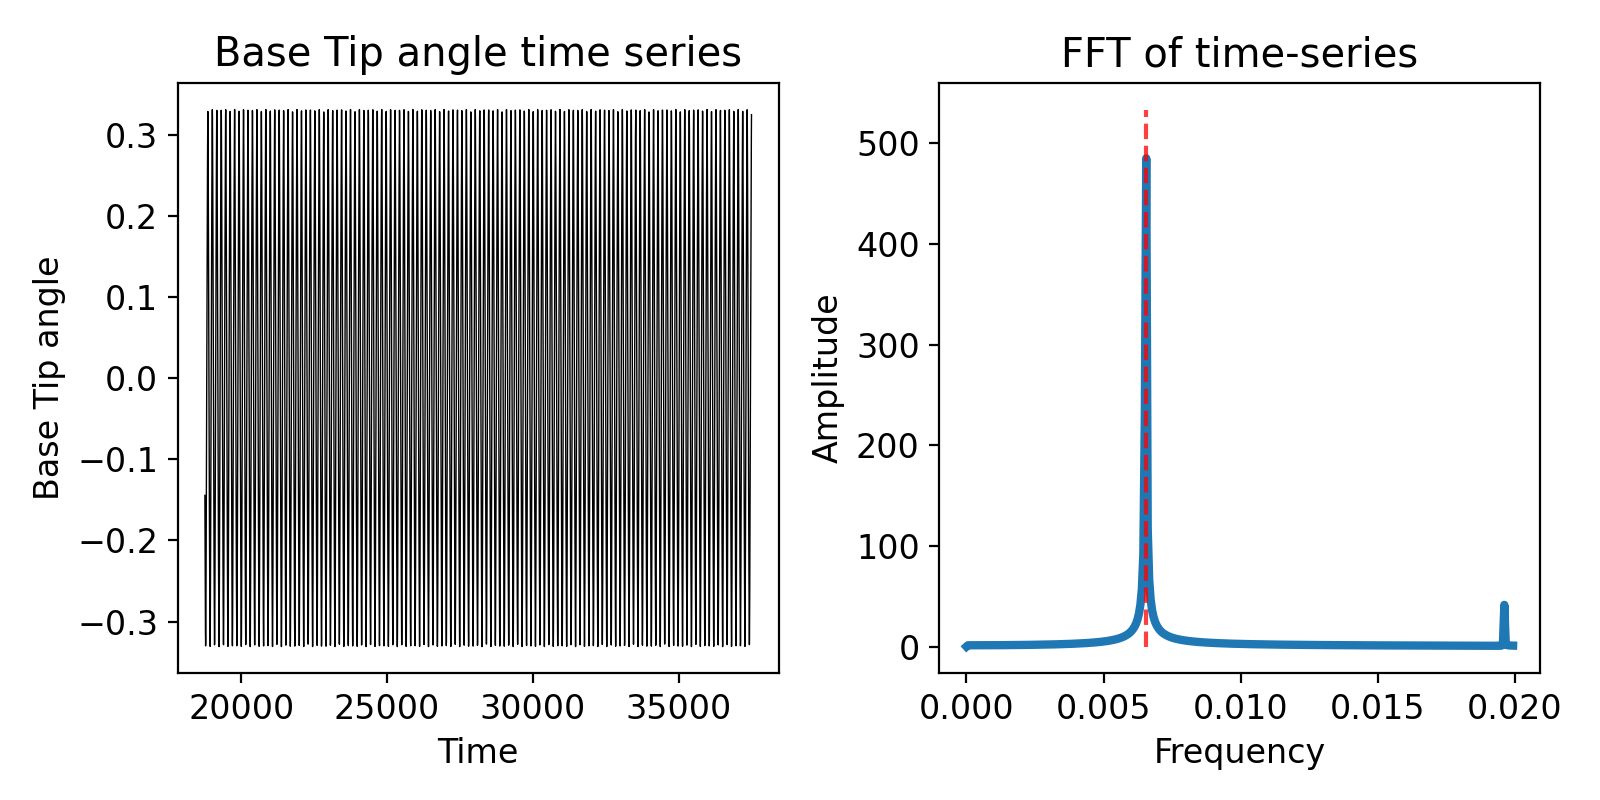

**************************************************
Time-scales
**************************************************
Stretch relzation time: 0.43
Bend relaxation time: 228072.75
Active motility time-scale: 1.88
31
**************************************************
Dimensionless numbers
**************************************************
Force per unit lenth due to activity: 0.00137
Activity number: 889.75787
**************************************************
Time series sample rate: 0.20002666666666666
Flapping freq: 0.010771897271838618 cycles/time
Flapping time: 92.83415676589658


<IPython.core.display.Javascript object>


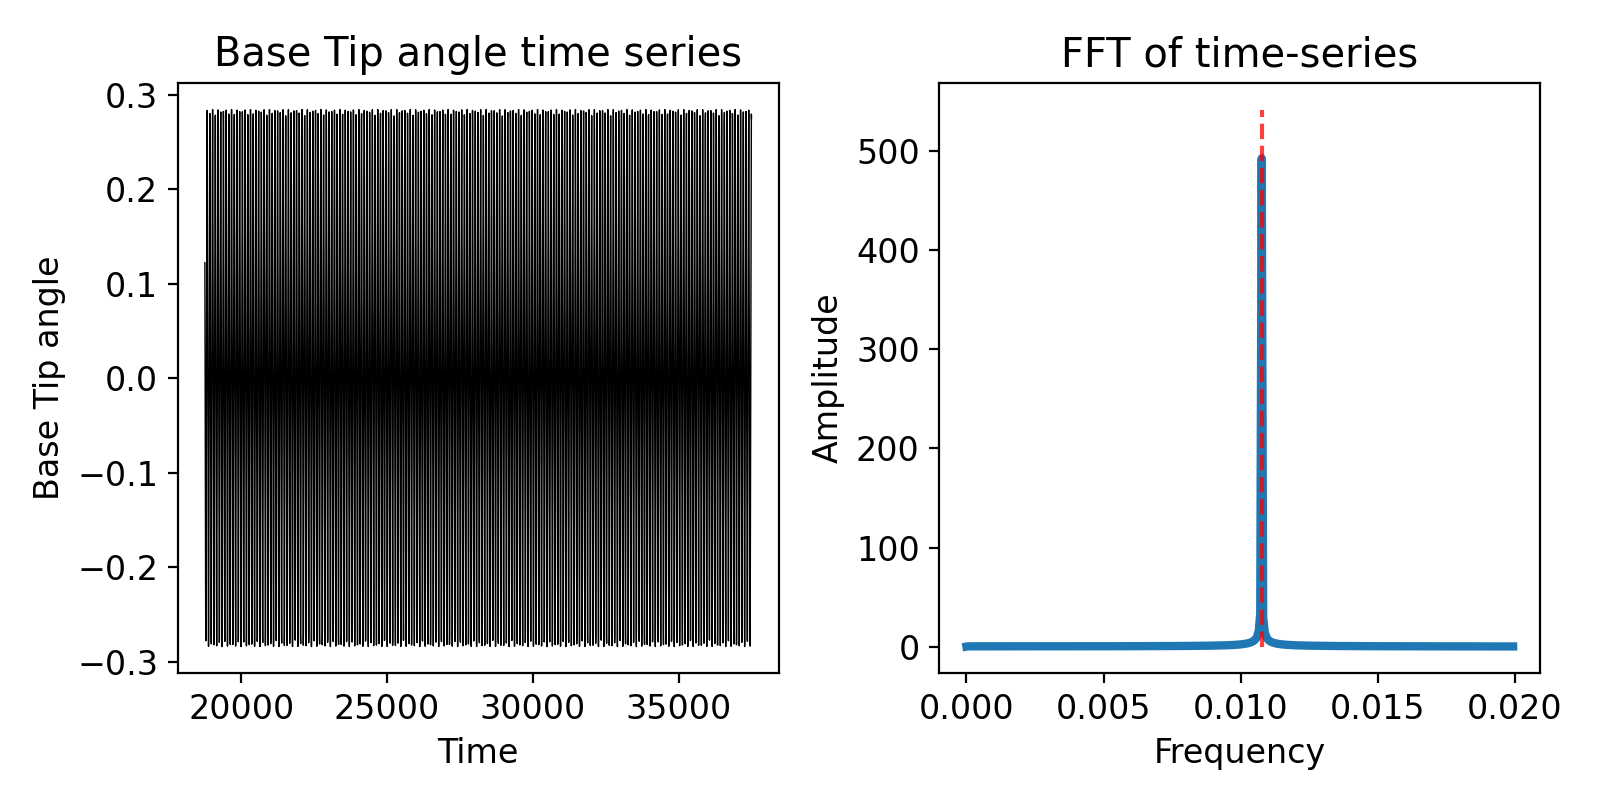

**************************************************
Time-scales
**************************************************
Stretch relzation time: 0.43
Bend relaxation time: 228072.75
Active motility time-scale: 1.33
31
**************************************************
Dimensionless numbers
**************************************************
Force per unit lenth due to activity: 0.00192
Activity number: 1251.222
**************************************************
Time series sample rate: 0.20002666666666666
Flapping freq: 0.007838954945347906 cycles/time
Flapping time: 127.56802494361298


<IPython.core.display.Javascript object>


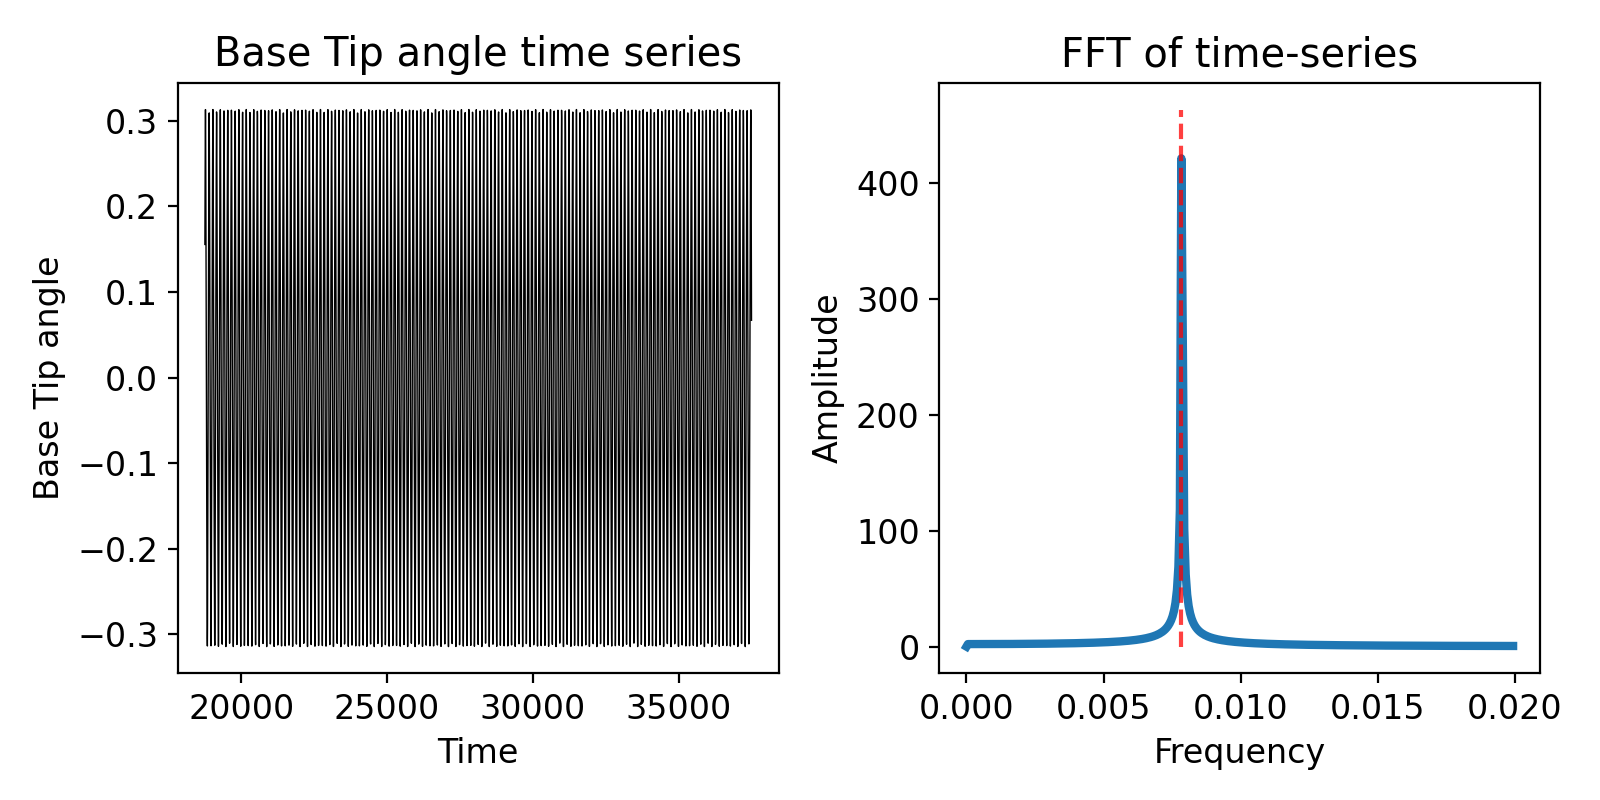

**************************************************
Time-scales
**************************************************
Stretch relzation time: 0.43
Bend relaxation time: 228072.75
Active motility time-scale: 1.65
31
**************************************************
Dimensionless numbers
**************************************************
Force per unit lenth due to activity: 0.00155
Activity number: 1010.24591
**************************************************
Time series sample rate: 0.20002666666666666
Flapping freq: 0.0006399146894161556 cycles/time
Flapping time: 1562.708305559259


<IPython.core.display.Javascript object>


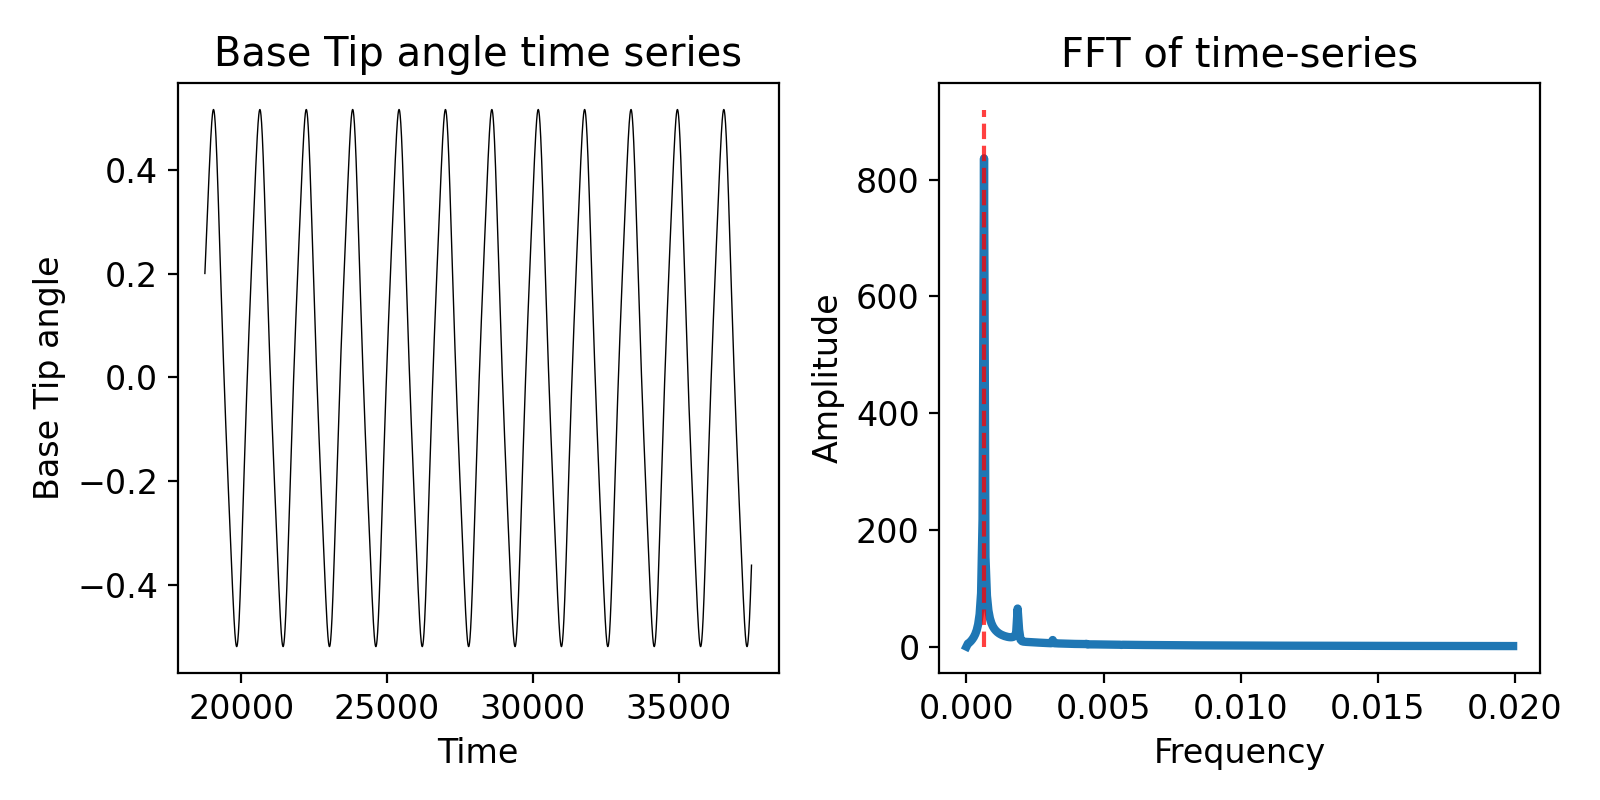

**************************************************
Time-scales
**************************************************
Stretch relzation time: 0.43
Bend relaxation time: 228072.75
Active motility time-scale: 10.0
31
**************************************************
Dimensionless numbers
**************************************************
Force per unit lenth due to activity: 0.00026
Activity number: 166.8296
**************************************************
Time series sample rate: 0.20002666666666666
Flapping freq: 0.005332622411801297 cycles/time
Flapping time: 187.52499666711108


<IPython.core.display.Javascript object>


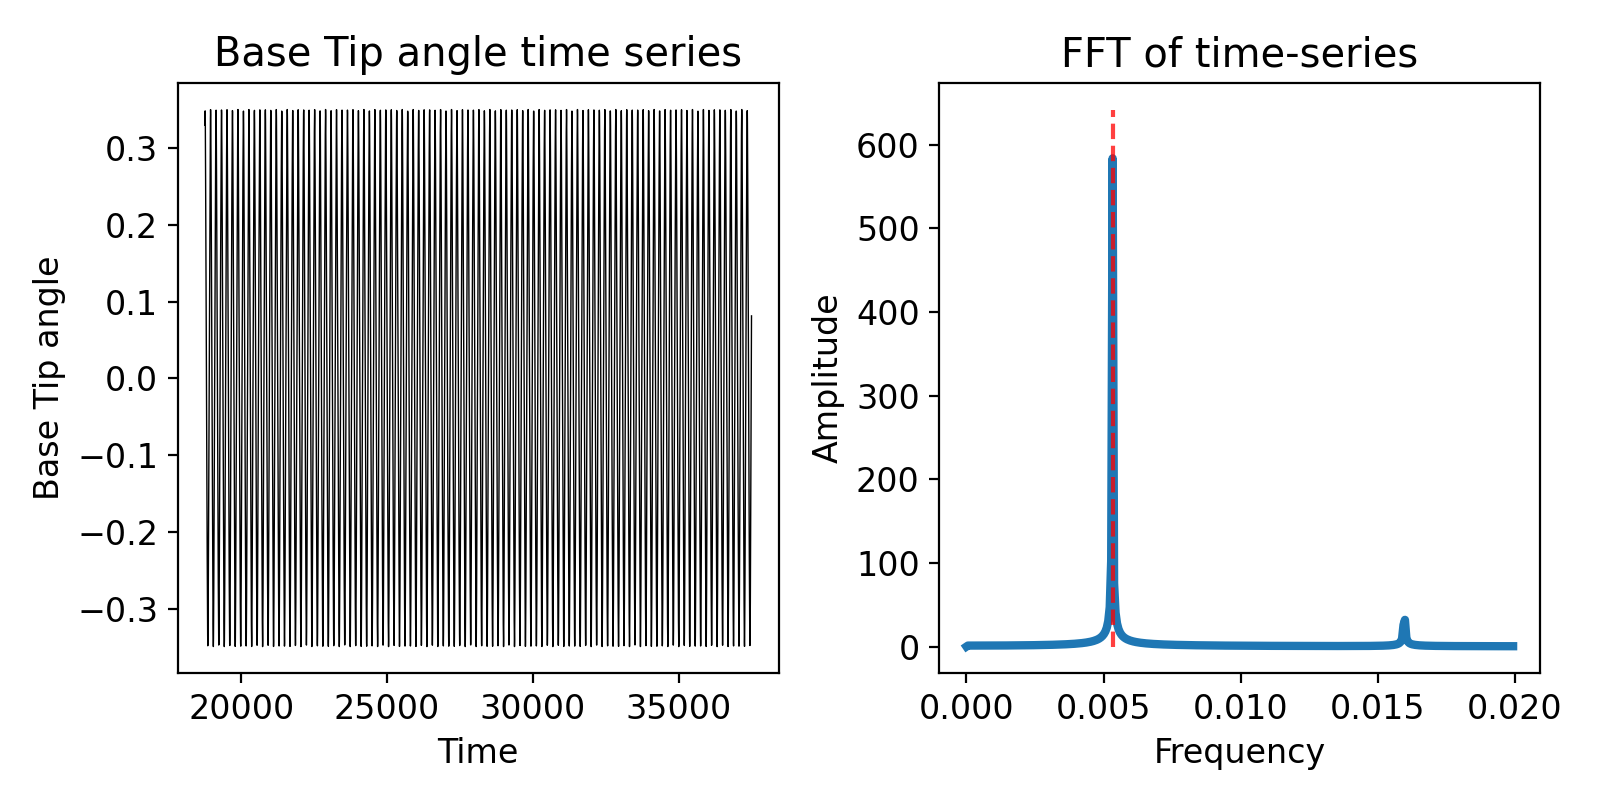

**************************************************
Time-scales
**************************************************
Stretch relzation time: 0.43
Bend relaxation time: 228072.75
Active motility time-scale: 2.17
31
**************************************************
Dimensionless numbers
**************************************************
Force per unit lenth due to activity: 0.00118
Activity number: 769.26982
**************************************************
Time series sample rate: 0.20002666666666666
Flapping freq: 0.003146247222962765 cycles/time
Flapping time: 317.8389774018832


<IPython.core.display.Javascript object>


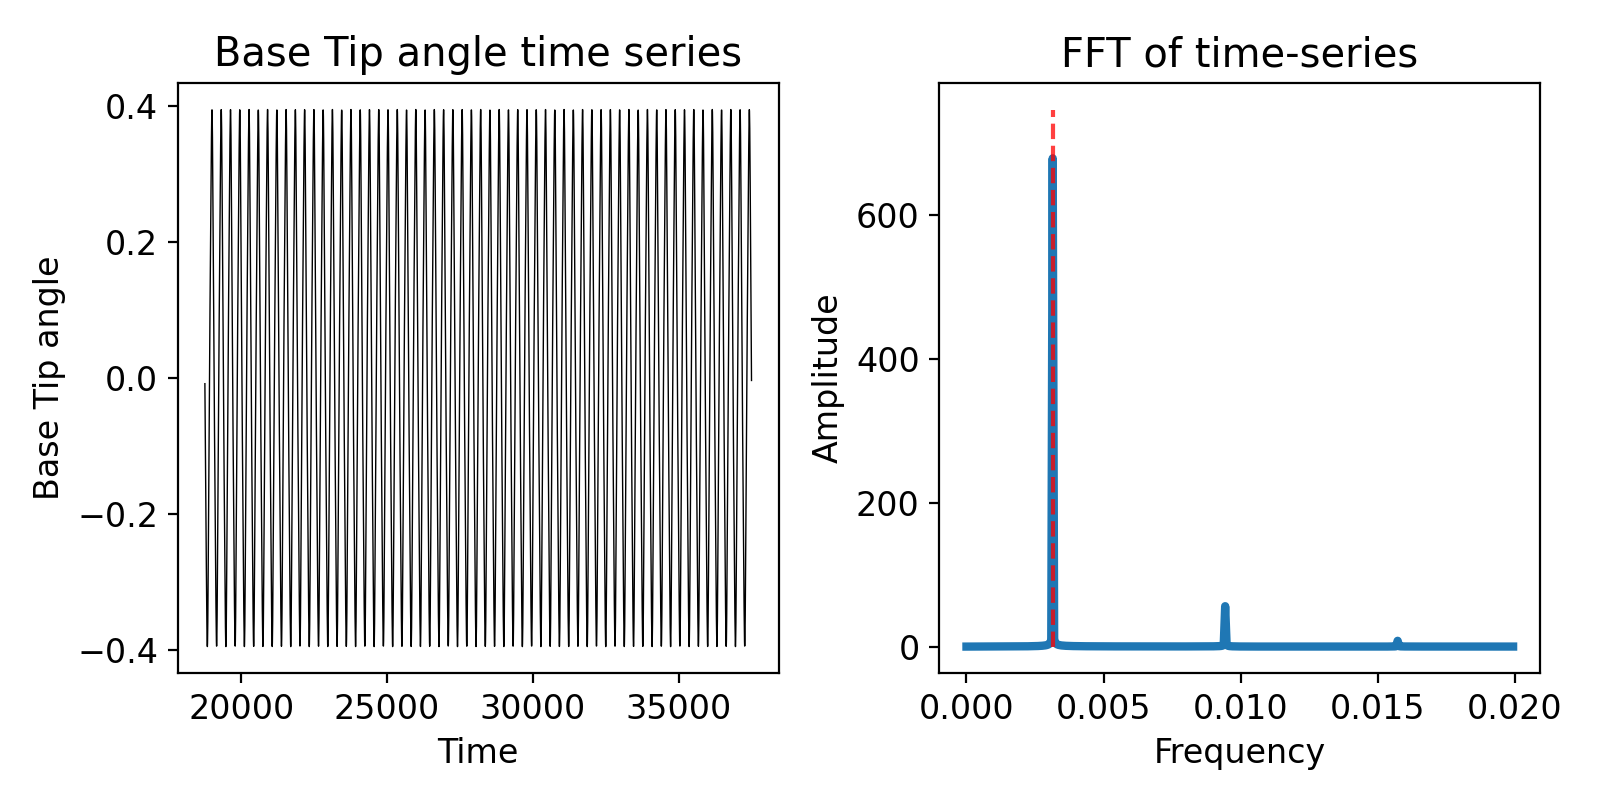

**************************************************
Time-scales
**************************************************
Stretch relzation time: 0.43
Bend relaxation time: 228072.75
Active motility time-scale: 3.16
31
**************************************************
Dimensionless numbers
**************************************************
Force per unit lenth due to activity: 0.00081
Activity number: 528.29373
**************************************************
Time series sample rate: 0.20002666666666666
Flapping freq: 0.0042127717053230245 cycles/time
Flapping time: 237.37341350267224


<IPython.core.display.Javascript object>


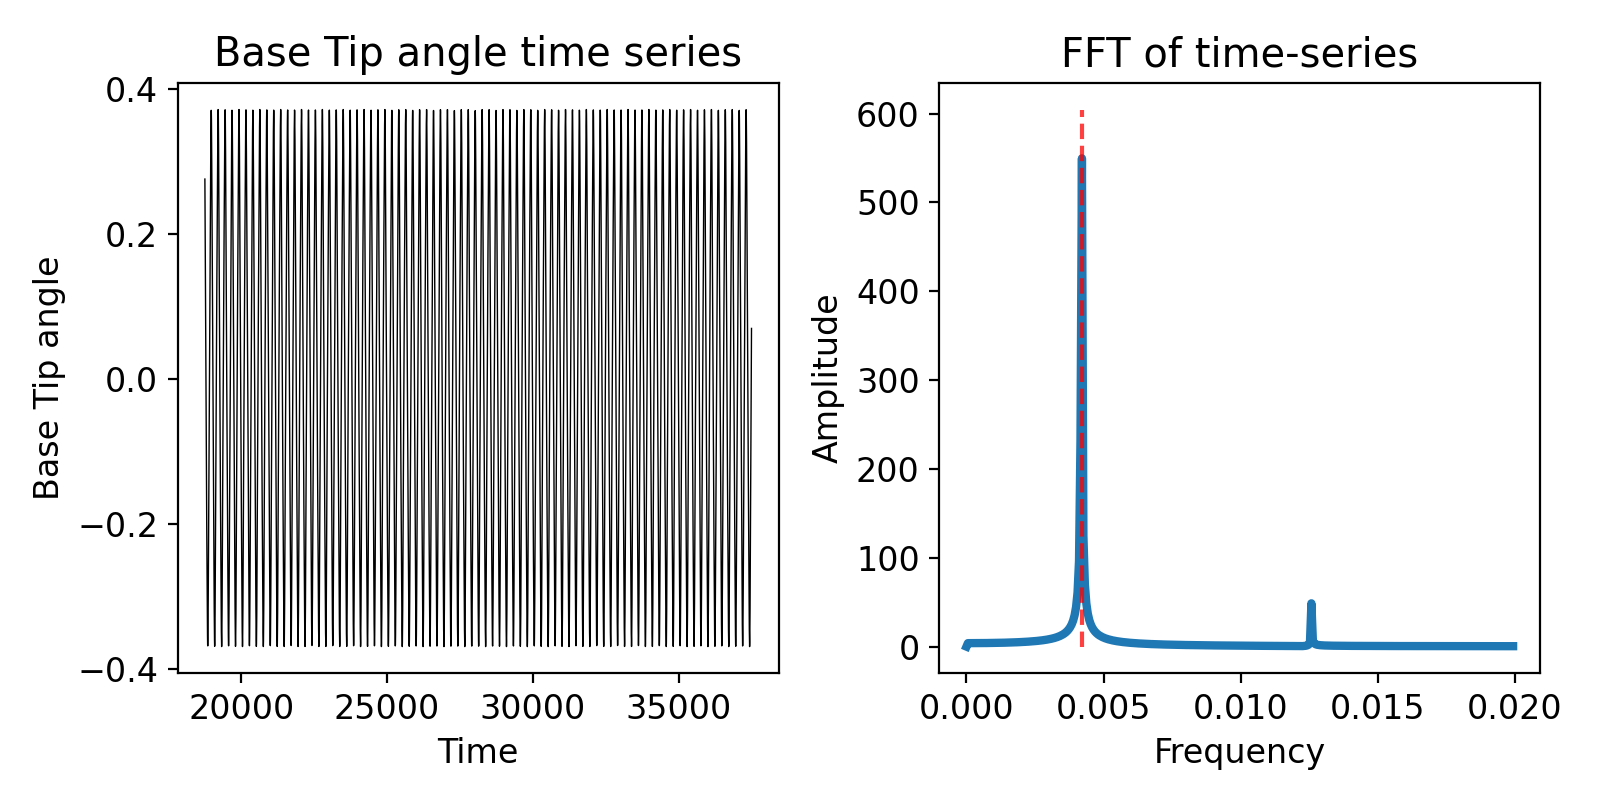

**************************************************
Time-scales
**************************************************
Stretch relzation time: 0.43
Bend relaxation time: 228072.75
Active motility time-scale: 2.57
31
**************************************************
Dimensionless numbers
**************************************************
Force per unit lenth due to activity: 0.001
Activity number: 648.78178
**************************************************
Time series sample rate: 0.20002666666666666
Flapping freq: 0.0021863751888385316 cycles/time
Flapping time: 457.37804065149044


<IPython.core.display.Javascript object>


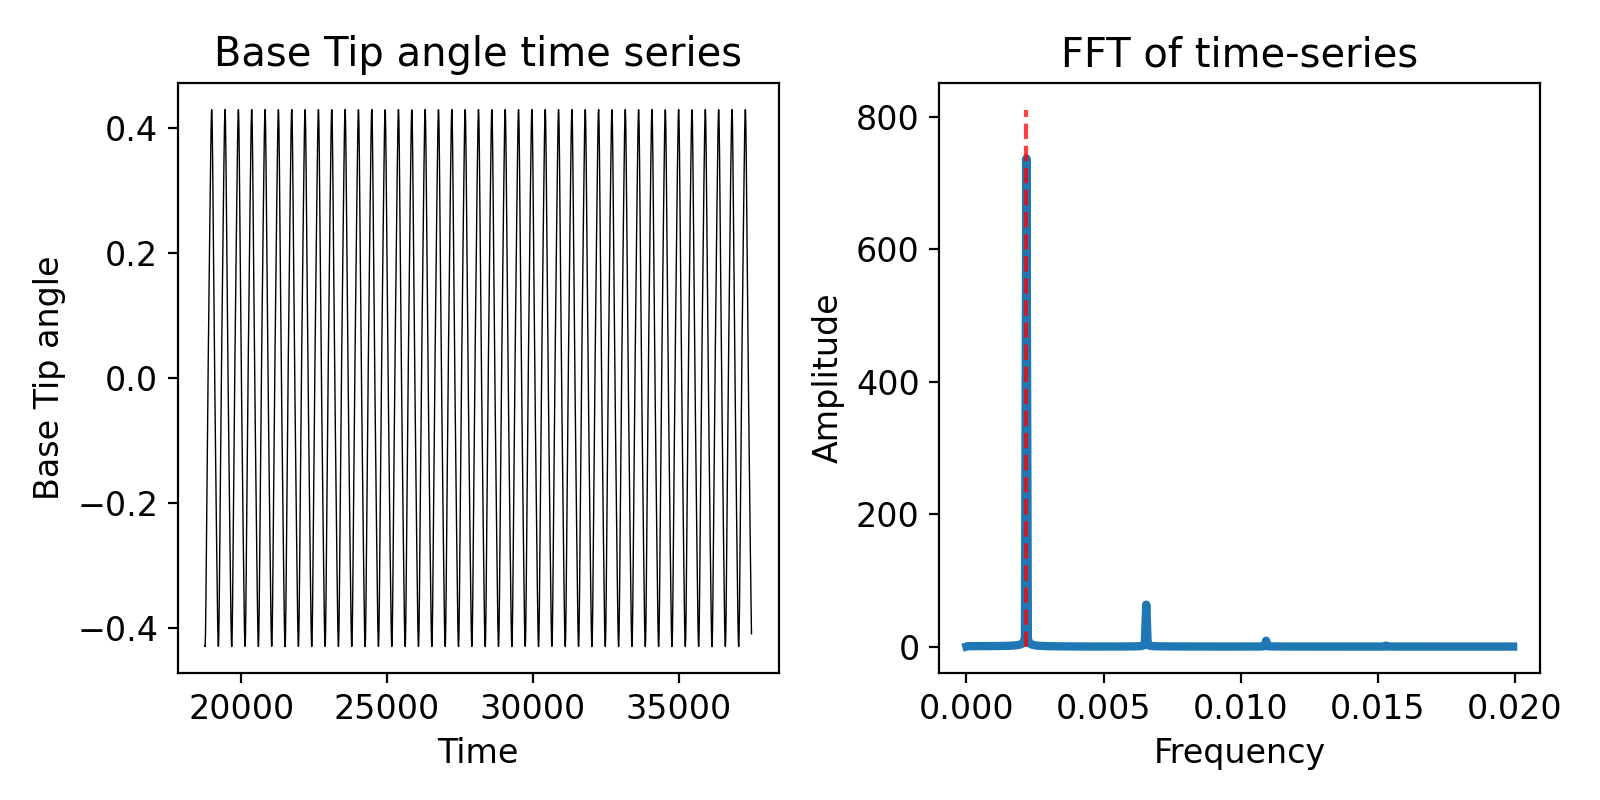

**************************************************
Time-scales
**************************************************
Stretch relzation time: 0.43
Bend relaxation time: 228072.75
Active motility time-scale: 4.09
31
**************************************************
Dimensionless numbers
**************************************************
Force per unit lenth due to activity: 0.00063
Activity number: 407.80569
**************************************************
Time series sample rate: 0.20002666666666666
Flapping freq: 0.009278762996534256 cycles/time
Flapping time: 107.77298659029373


<IPython.core.display.Javascript object>


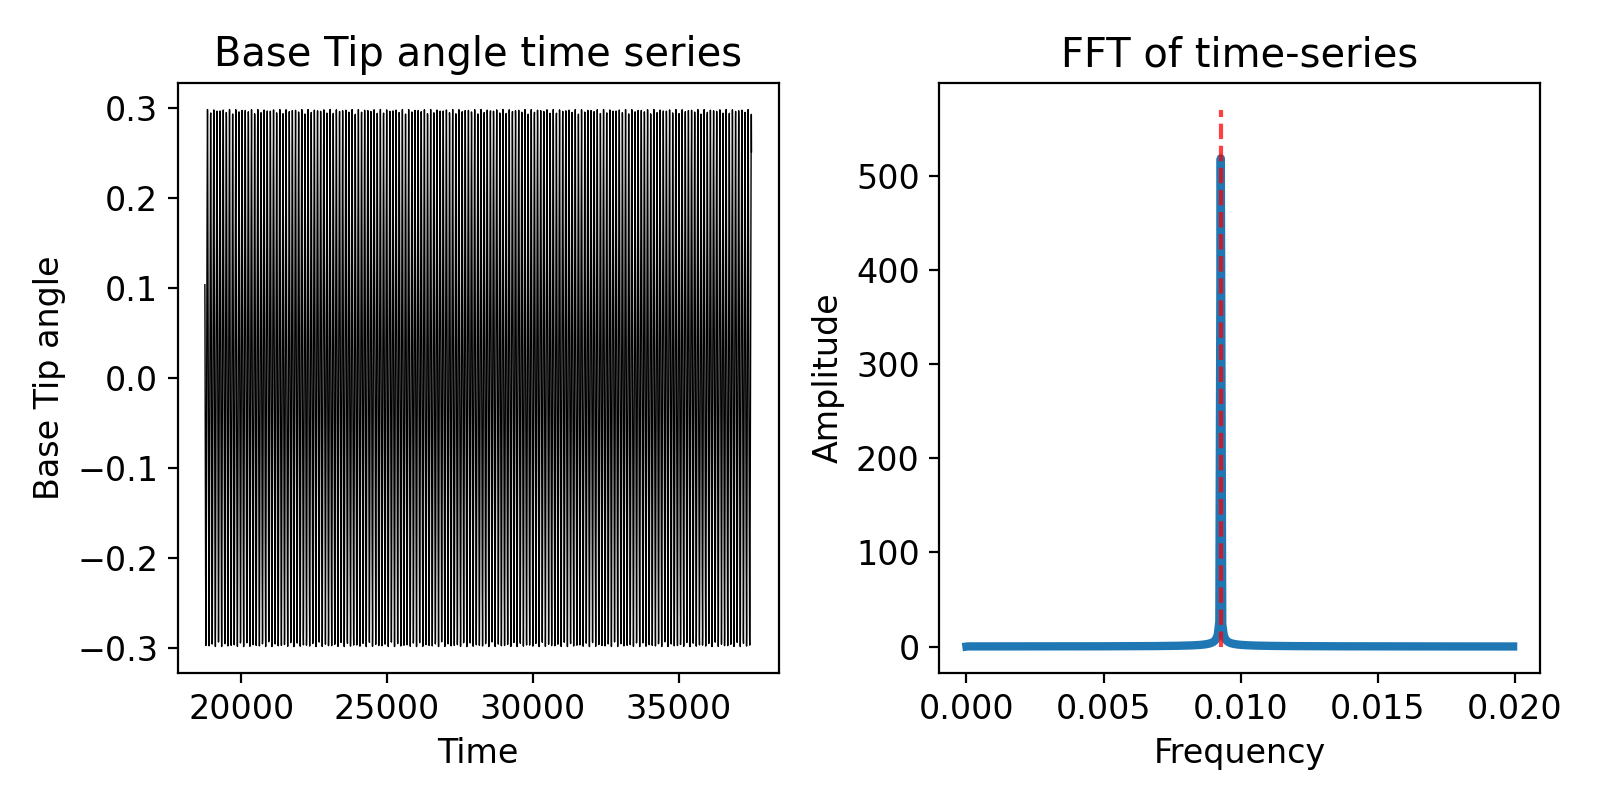

**************************************************
Time-scales
**************************************************
Stretch relzation time: 0.43
Bend relaxation time: 228072.75
Active motility time-scale: 1.48
31
**************************************************
Dimensionless numbers
**************************************************
Force per unit lenth due to activity: 0.00174
Activity number: 1130.73396
**************************************************


In [48]:
# data_folder = '/home/deepak/ActiveFilamentsSearch_backup_3/ConstantCompressiveActivity_sweep/FinalSims'

data_folder = '/home/deepak/ActiveFilamentsSearch_backup_3/ModellingResults/2022-12-26'

df_freq = pd.DataFrame({})
 # Walk through the folders and identify the simulation data files
for dirs, subdirs, files in os.walk(data_folder, topdown=False):

    root, subFolderName = os.path.split(dirs)

    for file in files:
        if(file.endswith('hdf5')):
            filament = analysis.analysisTools(file = os.path.join(dirs, file))
            
            freq = compute_filament_freq(filament = filament, plot = True)
            filament.time_scales()
            filament.compute_scales()
            filament.compute_dimensionless_groups()       
            
            df_freq = df_freq.append(pd.DataFrame({'potDipole strength':[filament.D0], 
                                   'Activity number':[filament.activity_number], 'Frequency':[freq]}))
           
            
               


In [49]:
df_freq

potDipole strength  Activity number  Frequency
0            0.172222       287.317644   0.001333
0            0.533333       889.757867   0.006559
0            0.750000      1251.222000   0.010772
0            0.605556      1010.245911   0.007839
0            0.100000       166.829600   0.000640
0            0.461111       769.269822   0.005333
0            0.316667       528.293733   0.003146
0            0.388889       648.781778   0.004213
0            0.244444       407.805689   0.002186
0            0.677778      1130.733956   0.009279

In [56]:
# Fit a power-law to the data
from scipy.optimize import curve_fit

def f(x, A):
    
    return A*x**(-4/3)

# xdata = np.array(df_freq['Activity number'])

xdata = np.array(df_freq['potDipole strength'])
ydata = np.array(1/df_freq['Frequency'])

popt, pcov = curve_fit(f, xdata, ydata)


A_opt = popt[0]
# B_opt = popt[1]

print(A_opt)

y_fit = np.array([f(x, A_opt) for x in xdata])

idx = np.argsort(xdata)

xdata = xdata[idx]
ydata = ydata[idx]
y_fit = y_fit[idx]

print(xdata)

71.81376540547345
[0.1        0.17222222 0.24444444 0.31666667 0.38888889 0.46111111
 0.53333333 0.60555556 0.67777778 0.75      ]


<IPython.core.display.Javascript object>


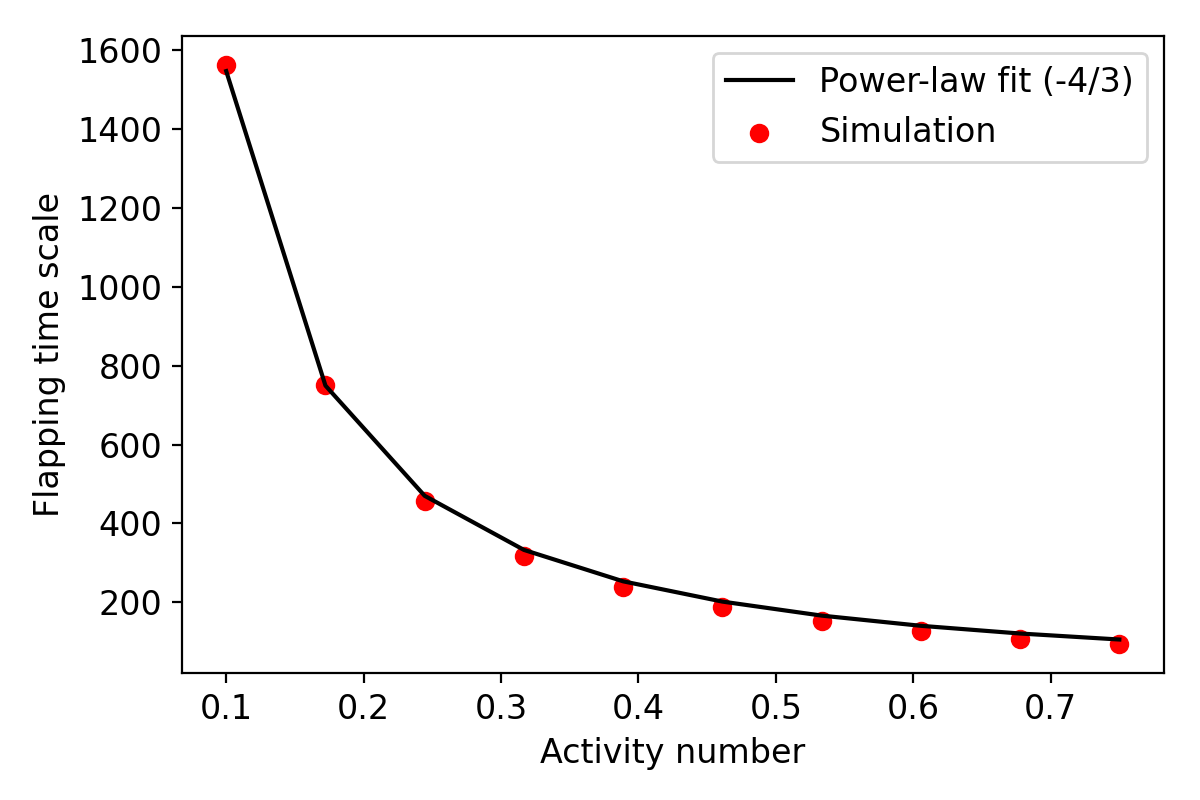

In [59]:
# Plot Flapping freq vs activity strength
file_path = '/home/deepak/Dropbox/LacryModeling/ActiveFilamentsManuscript/Figures/Validation'
save = True

plt.figure(figsize=(6,4))
title = 'FlappingTime_vs_activityStrength_DistributedActivity_LacryType'
# Predicted power law
plt.plot(xdata, y_fit, color = 'k', label ='Power-law fit (-4/3)')
plt.scatter(xdata, ydata, color = 'r', label = 'Simulation')


plt.xlabel('Activity number')
plt.ylabel('Flapping time scale')

plt.legend()
# plt.xscale('log')
# plt.yscale('log')
# plt.xlim([15, 60])
# plt.ylim([100, 10000])
plt.tight_layout()
if save:
    plt.savefig(os.path.join(file_path, title+'.png'), dpi = 300)
    plt.savefig(os.path.join(file_path, title+'.svg'), dpi = 300)
plt.show()